In [403]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, RidgeCV, LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

import math

In [163]:
data = pd.read_csv("C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/kc_house_data.csv")
data_model = data

In [164]:
data_model = data_model[["price", "sqft_living"]]

data_model["sqft_living"] = data_model["sqft_living"].astype(float)

C:\Users\Witek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
def create_polynomial_vars(feature, n):

    polynomial = pd.DataFrame()
    polynomial["feature1"] = feature
    
    for i in range(2, n+1):
        name = 'feature' + str(i)
        polynomial[name] = feature.apply(lambda x: x ** i)
    
    return polynomial

In [286]:
def regression_polynomial(data_model, alpha):
    data_model = data_model.sort_values(by=['sqft_living','price'])
    
    y = data_model["price"]
    x = create_polynomial_vars(data_model["sqft_living"], 15)
    
    regr = LinearRegression(normalize=True)
    regr.fit(x, y)
    
    simple_coefs = pd.DataFrame(regr.coef_, index = x.columns.values, columns = ["simple regression"])
    
    alpha_ridge = alpha
    ridgereg = Ridge(alpha=alpha_ridge, normalize = True)
    ridgereg.fit(x, y)
    
    ridge_coefs = pd.DataFrame(ridgereg.coef_, index = x.columns.values, columns = ["ridge regression"])
    result = pd.concat([simple_coefs,ridge_coefs], axis=1)
    data_model = data_model.sort_values(by=['sqft_living','price'])
    
    y_fit = regr.predict(x)
    y_reg_fit = ridgereg.predict(x)

    fig_size = [15,9]
    plt.rcParams["figure.figsize"] = fig_size

    plt.scatter(x["feature1"], y,color='gray')
    plt.plot(x["feature1"], y_fit,color='blue')
    plt.plot(x["feature1"], y_reg_fit,color='red')
    
    return result
    

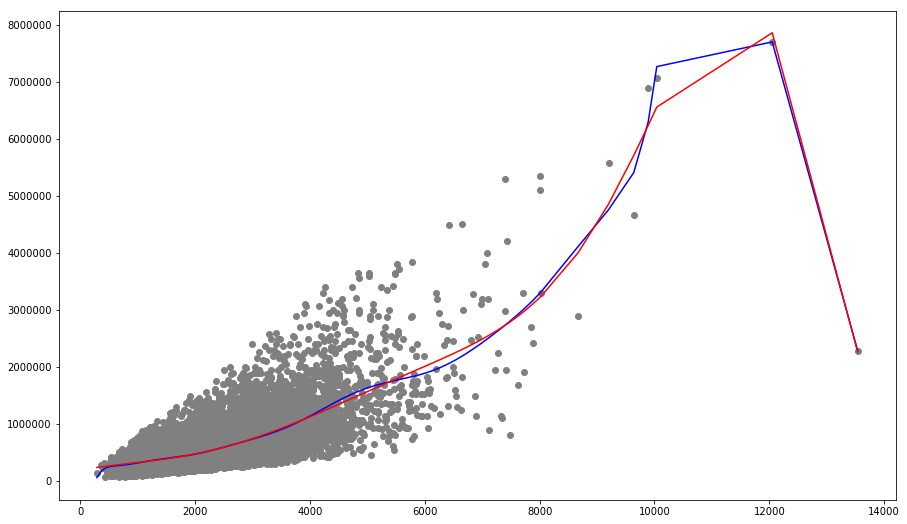

In [289]:
res1 = regression_polynomial(data_model, 1e-5)

In [ ]:
The same results as in regression so fine.
But achived only if we set normalize = True:
"If normalize = True, the regressors X will be normalized before regression by subtracting 
the mean and dividing by the l2-norm."

In [ ]:
Remove one building with sqft > 13k

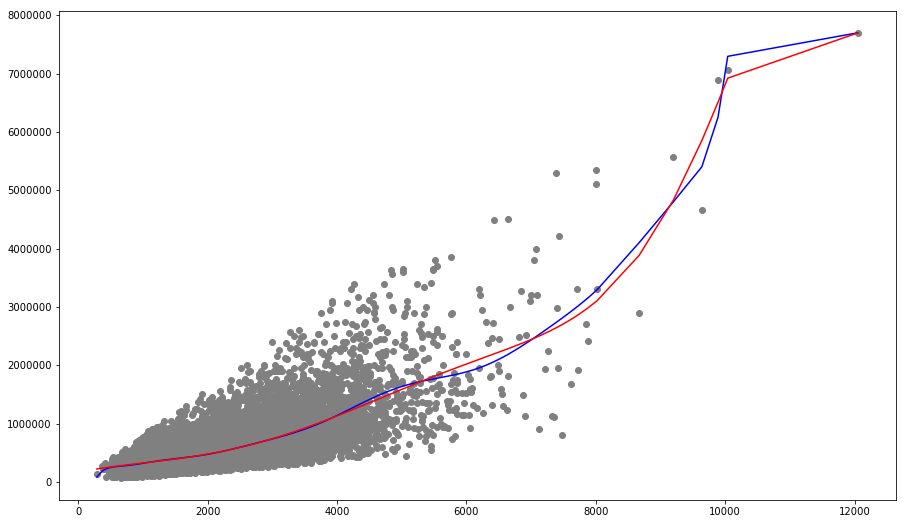

In [290]:
data_model2 = data_model.loc[data_model["sqft_living"] < 13000]

res2 = regression_polynomial(data_model2, 1e-5)

In [292]:
result = pd.concat([res1, res2], axis=1)

In [293]:
result

,simple regression,ridge regression,simple regression,ridge regression
feature1,1.457138e+04,1.744255e+02,1.227653e+04,2.125583e+02
feature2,-4.264921e+01,-7.836441e-02,-3.572338e+01,-8.830897e-02
feature3,7.012918e-02,3.732804e-05,5.842554e-02,3.326324e-05
feature4,-7.212278e-05,-2.855543e-09,-5.962074e-05,-1.088657e-09
feature5,4.949612e-08,-2.374876e-13,4.048026e-08,-3.431704e-13
feature6,-2.360221e-11,9.705297e-18,-1.903477e-11,-3.756767e-18
feature7,8.026511e-15,1.777918e-21,6.360553e-15,1.841990e-21
feature8,-1.977271e-18,9.769932e-26,-1.533589e-18,1.728194e-25
feature9,3.552264e-22,7.788973e-31,2.684964e-22,6.689552e-30
feature10,-4.644387e-26,-3.838337e-34,-3.404320e-26,-2.030036e-34


In [295]:
data_part1 = pd.read_csv("C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/wk3_kc_house_set_1_data.csv")[["price", "sqft_living"]]
data_part2 = pd.read_csv("C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/wk3_kc_house_set_2_data.csv")[["price", "sqft_living"]]
data_part3 = pd.read_csv("C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/wk3_kc_house_set_3_data.csv")[["price", "sqft_living"]]
data_part4 = pd.read_csv("C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/wk3_kc_house_set_4_data.csv")[["price", "sqft_living"]]

In [297]:
data_part1["sqft_living"] = data_part1["sqft_living"].astype(float)
data_part2["sqft_living"] = data_part2["sqft_living"].astype(float)
data_part3["sqft_living"] = data_part3["sqft_living"].astype(float)
data_part4["sqft_living"] = data_part4["sqft_living"].astype(float)

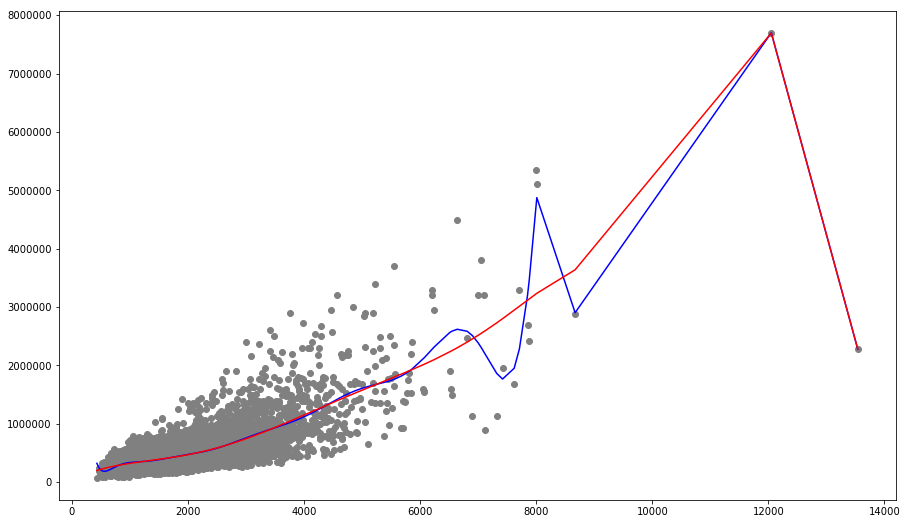

In [298]:
res_part1 = regression_polynomial(data_part1, 1e-9)

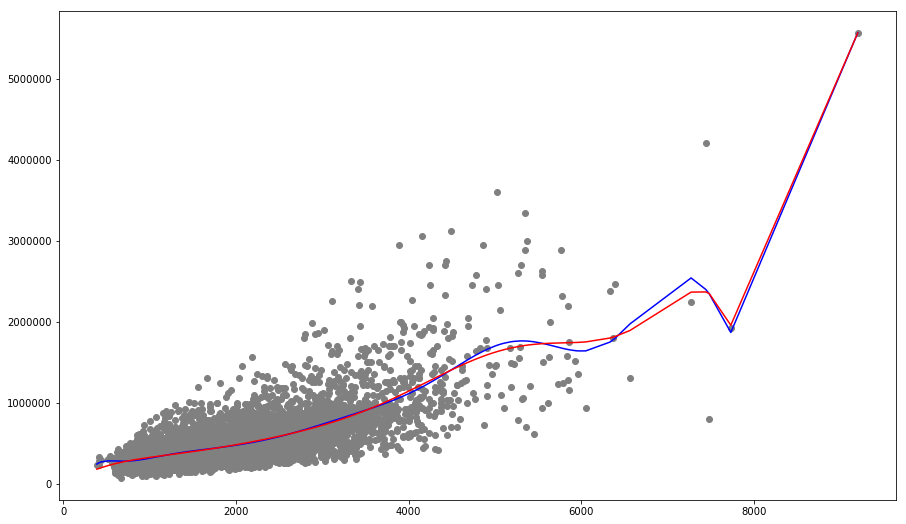

In [299]:
res_part2 = regression_polynomial(data_part2, 1e-9)

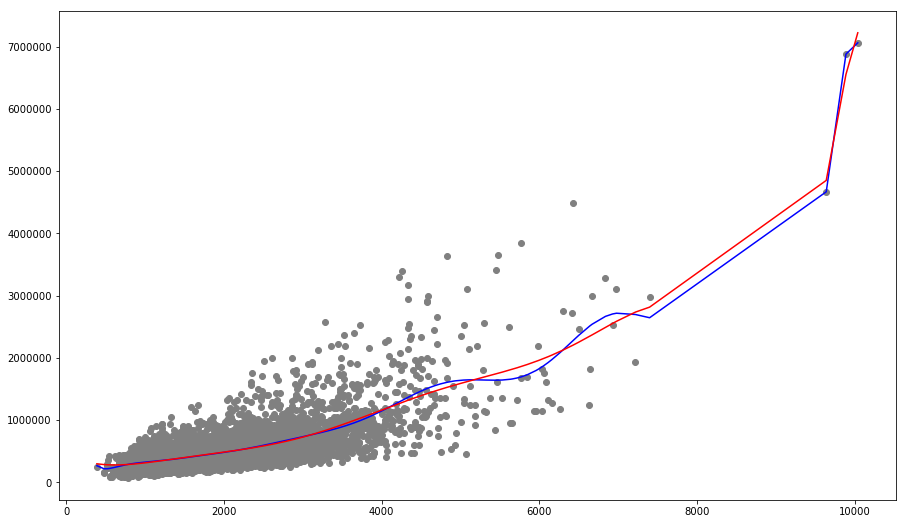

In [300]:
res_part3 = regression_polynomial(data_part3, 1e-9)

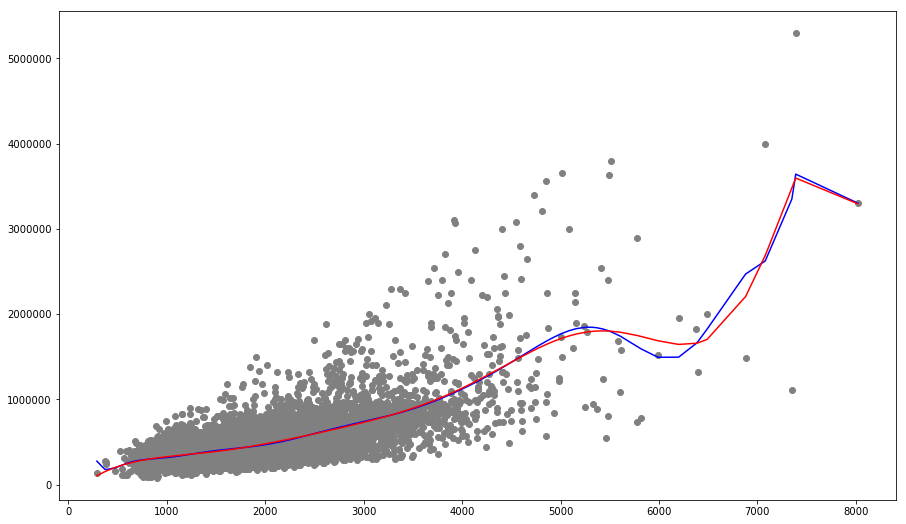

In [301]:
res_part4 = regression_polynomial(data_part4, 1e-9)

In [ ]:
9. Generally, whenever we see weights change so much in response to change in data, 
we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing 
"large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in 
the order of thousands.)

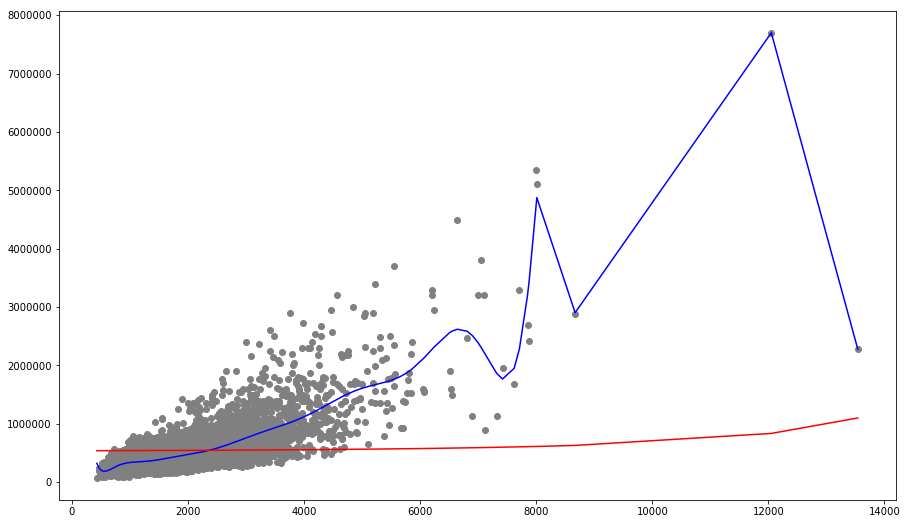

In [302]:
res_part1 = regression_polynomial(data_part1, 1.23e2)

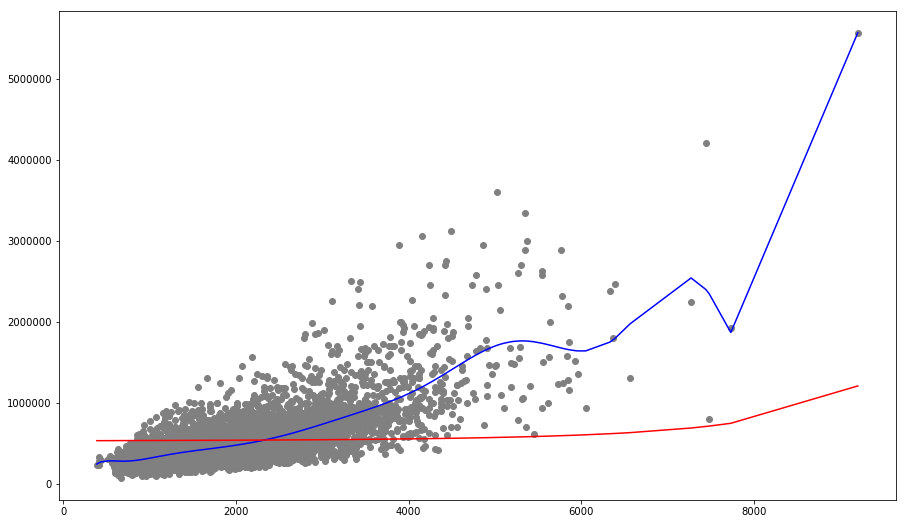

In [303]:
res_part2 = regression_polynomial(data_part2, 1.23e2)

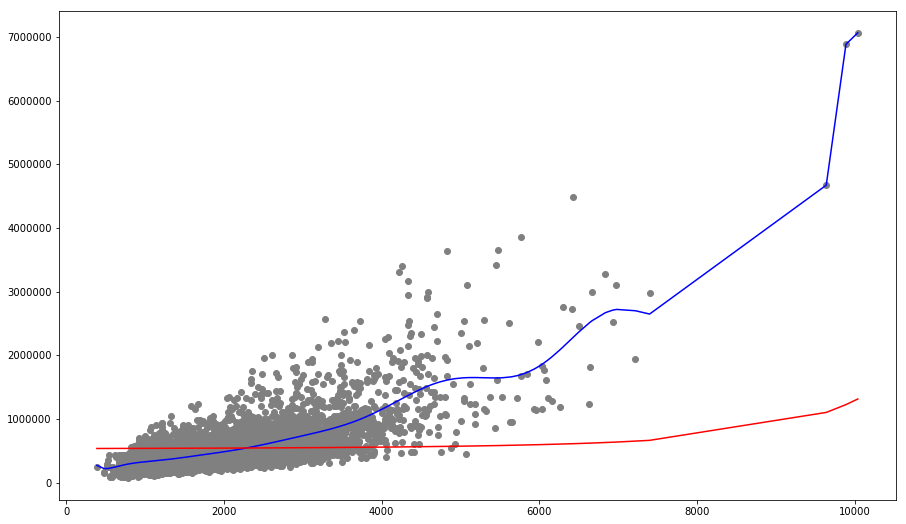

In [304]:
res_part3 = regression_polynomial(data_part3, 1.23e2)

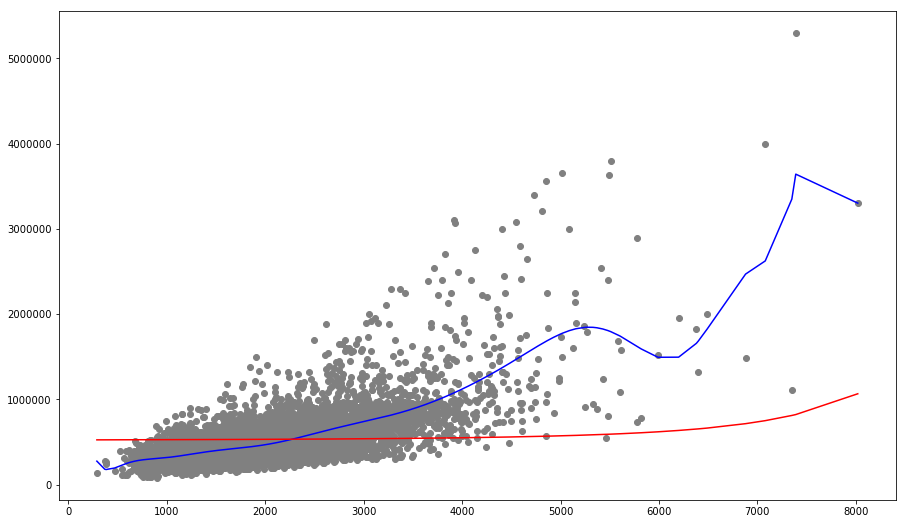

In [305]:
res_part4 = regression_polynomial(data_part4, 1.23e2)

In [307]:
data_shuffled = pd.read_csv("C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/wk3_kc_house_train_valid_shuffled.csv")[["price", "sqft_living"]]

In [343]:
data_shuffled = data_shuffled[["price", "sqft_living"]]
data_shuffled["sqft_living"] = data_shuffled["sqft_living"].astype(float)

In [344]:
data_shuffled.head(n=5)

,price,sqft_living
0,665000.0,2800.0
1,645000.0,2490.0
2,640000.0,2340.0
3,594000.0,1320.0
4,365000.0,1904.0


In [406]:
def k_fold_function(k, alpha):
    n = len(data_shuffled)
    
    error = pd.DataFrame(columns = ["error"], index = range(k))
    
    for i in range(k):
        start = int(i * n / k)
        end = int((i+1) * n / k)
        data_test = data_shuffled[start:end]
        data_train = data_shuffled[0:start].append(data_shuffled[end+1:n])
        
        y = data_train["price"]
        x = create_polynomial_vars(data_train["sqft_living"], 15)
        
        y_val = data_test["price"]
        x_val = create_polynomial_vars(data_test["sqft_living"], 15)
        
        alpha_ridge = alpha
        ridgereg = Ridge(alpha=alpha_ridge, normalize = True)
        ridgereg.fit(x, y)
        
        y_reg_fit = ridgereg.predict(x_val)
        
        error.iloc[i] = sum((y_reg_fit - y_val)**2)
    
    return np.mean(error)

In [418]:
penalties = np.logspace(0.1, 3, num=13)

In [420]:
for i in range(len(penalties)):
    me = k_fold_function(10, penalties[i])
    print(me)

error    1.368096e+14
dtype: float64
error    1.556600e+14
dtype: float64
error    1.822343e+14
dtype: float64
error    2.087821e+14
dtype: float64
error    2.281913e+14
dtype: float64
error    2.401082e+14
dtype: float64
error    2.478400e+14
dtype: float64
error    2.535856e+14
dtype: float64
error    2.579174e+14
dtype: float64
error    2.609717e+14
dtype: float64
error    2.629765e+14
dtype: float64
error    2.642253e+14
dtype: float64
error    2.649773e+14
dtype: float64


In [ ]:
Best ridge regression for penalties[0]

In [421]:
penalties[0]

1.2589254117941673

In [422]:
alpha_ridge = penalties[0]
ridgereg = Ridge(alpha=alpha_ridge, normalize = True)

x = create_polynomial_vars(data_shuffled["sqft_living"], 15)
y = data_shuffled["price"]
ridgereg.fit(x, y)

ridgereg.coef_

array([  7.29493349e+01,   1.21573660e-02,   1.34402395e-06,
         7.82240933e-11,   3.02781275e-15,   8.19410231e-20,
        -3.75919545e-25,  -3.31856690e-28,  -3.99241170e-32,
        -3.77628321e-36,  -3.25190222e-40,  -2.66794373e-44,
        -2.12657713e-48,  -1.66352392e-52,  -1.28454465e-56])